# Craig Cox Loss Correlation 

Craig Cox Loss correlation is used to estimate enthalpy loss for axial turbines both steam and gas turbines. The losses are very complicated, they measure losses from disk windage, pitch to chord variations, hub disk seals, incidence, aspect ratio, etc. 

The only thing missing is a figure on secondary loss coefficient ($N_{sr}$). This coefficient is nowhere to be found so we use $N_{pr}$ instead.

Craig and Cox performed their experiments using a Cascade wind tunnel. Reynolds number ranges from 2E4 to 4E6 at outlet mach numbers 0.8 to 2.0

One thing to note is with these loss models, the authors attempt to derive an equation that couples physical geometry with the effects of loss in experimental measurements. 

The purpose of this tutorial is to illustrate how to use the csv files containing plot data to build a dataset pickle file for the loss model code craigcox.py to load and predict the pressure loss.



## Convention
![convention](./Fig01_velocity_triangle.jpg)

## Build a Dataset pickle file

Craig Cox paper contains equations and figures. Almost all the figures are used to perform calculations. This can be a challenge which is why data from each figure has been extracted to a csv file and curve fitted using a LSQBivariateSpline.

In [1]:
!pip install td3

ERROR: Could not find a version that satisfies the requirement td3 (from versions: none)
ERROR: No matching distribution found for td3


In [3]:
import sys
sys.path.insert(0,"../../../")
from td3 import LossInterp

In [4]:
data = {
            'Fig03':LossInterp("Fig03_profile_loss_ratio.csv",
                                        xlabel="Reynolds Number",
                                        ylabel="Profile Loss Ratio",
                                        clabel="Finish", logx10=True),
            
            'Fig04':LossInterp("Fig04_Lift_Parameter_FL.csv",
                                        xlabel="Outlet Flow Angle [Deg]",
                                        ylabel="Lift Parameter [Fl]",
                                        clabel="Fluid Inlet Angle at minimum loss"),
            
            'Fig05':LossInterp("Fig05_base_profile_loss.csv",
                                        xlabel="Modified Lift Coefficient",
                                        ylabel="Basic Profile Loss Parameter Xp(s/b)sin(beta)",
                                        clabel="Contraction Ratio"),
            
            'Fig06_delta_Xpt':LossInterp("Fig06_TE_Thickness_Loss_Increment.csv",
                                        xlabel="te/s",
                                        ylabel="Loss Increment Xpt"),
            
            'Fig06_Npt':LossInterp("Fig06_TE_Thickness_Profile_Loss.csv",
                               xlabel="te/s",
                               ylabel="Profile Loss Ratio Npt"),
            
            'Fig07':LossInterp("Fig07_contraction_ratio.csv",
                        xlabel='1-sin(alpha_out)/sin(alpha_in)',
                        ylabel='Contraction Ratio',
                        clabel='s/b'),
            
            'Fig08':LossInterp("Fig08_Profile_Loss_Increment.csv",
                        xlabel='Outlet Isentropic Mach Number',
                        ylabel='Profile Loss Increment',
                        clabel='arcsin((o+te)/s)'),
            
            'Fig09':LossInterp("Fig09_Profile_Loss_Increment.csv",
                        xlabel='Blade Pitch to Back Radius Ratio',
                        ylabel='Profile Loss Increment xp_se',
                        clabel='outlet isentropic mach'),
            
            'Fig10':LossInterp("Fig10_incidence_loss.csv",
                        xlabel='Incidence Ratio (i-imin)/(istall-imin)',
                        ylabel='Profile Loss Ratio Npi'),
            
            'Fig11':LossInterp("Fig11_Basic_Positive_stalling_incidence.csv",
                        xlabel='Blade Inlet Angle',
                        ylabel='Basic Positive Stalling Incidence (i+stall)',
                        clabel='asin(o/s)'),
            
            'Fig12_sb':LossInterp("Fig12_Incidence_Correction_i+istall.csv",
                        xlabel='Pitch to backbone length ratio s/b',
                        ylabel='incidence correction i-istall_sb',
                        clabel='asin(o/s)'),
            
            'Fig12_cr':LossInterp("Fig12_Incidence_Correction_i+istall_cr.csv",
                        xlabel='Blade Contraction Ratio',
                        ylabel='Incidence Correction i+istall',
                        clabel='asin(o/s)'),
            
            'Fig13':LossInterp("Fig13_Incidence_Correction_i-istall.csv",
                        xlabel='Pitch to backbone length ratio s/b',
                        ylabel='Incidence correction i-istall_sb',
                        clabel='asin(o/s)'),
            
            'Fig13_alpha1':LossInterp("Fig13_Negative_Stalling_Incidence_i-istall.csv",
                        xlabel='Blade Inlet Angle',
                        ylabel='Basic Negative Stalling Incidence (i-istall)',
                        clabel='asin(o/s)'),
            
            'Fig14_i-istall':LossInterp("Fig14_Basic_stalling_incidences_blade_angle_gt_90_i-istall.csv",
                        xlabel='Blade Inlet Angle',
                        ylabel='i-istall',
                        clabel='asin(o/s)'),
            
            'Fig14_i+istall':LossInterp("Fig14_Basic_stalling_incidences_blade_angle_gt_90_i+istall.csv",
                        xlabel='Blade Inlet Angle',
                        ylabel='i+istall',
                        clabel='asin(o/s)'),
            
            'Fig15':LossInterp("Fig15_Minimum_Loss_Incidence-Range_Ratio_Fi.csv",
                        xlabel='Blade Inlet Angle',
                        ylabel='incidence range ratio Fi',
                        clabel='s/b'),
            
            'Fig17':LossInterp("Fig17_Secondary_Loss_Ns_hb.csv",
                        xlabel='Inv Aspect Ratio',
                        ylabel='Secondary Loss Ratio'),
            
            'Fig18':LossInterp("Fig18_base_secondary_factor.csv",
                        xlabel='Vinlet^2/Voutlet^2',
                        ylabel='Basic Secondary Loss Factor',
                        clabel='Fl*s/b'),
            
            }

import pickle
import os, pathlib 

default_home = os.path.join(os.path.expanduser("~"), ".cache")
os.environ['TD3_HOME'] = os.path.join(default_home,'TD3_LossModels')
os.makedirs(os.environ['TD3_HOME'],exist_ok=True)
path = pathlib.Path(os.path.join(os.environ['TD3_HOME'],"craigcox"+".pkl"))

with open(path.absolute(),'wb') as f:
    pickle.dump(data,f)

c:\GitHub\TD3\references\Turbines\CraigCox\../../..\td3\lossinterp.py:90: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=12). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  self.func = LSQBivariateSpline(np.log10(self.x),self.c,self.y,np.log10(np.unique(self.x[:4])),np.unique(self.c[:4]))
c:\GitHub\TD3\references\Turbines\CraigCox\../../..\td3\lossinterp.py:92: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=11). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  self.func = LSQBivariateSpline(self.x,self.c,self.y,np.unique(self.x[:3]),np.unique(self.c[:3]))
c:\GitHub\TD3\references\Turbines\CraigCox\../../..\td3\lossinterp.py:92

## Validating Results

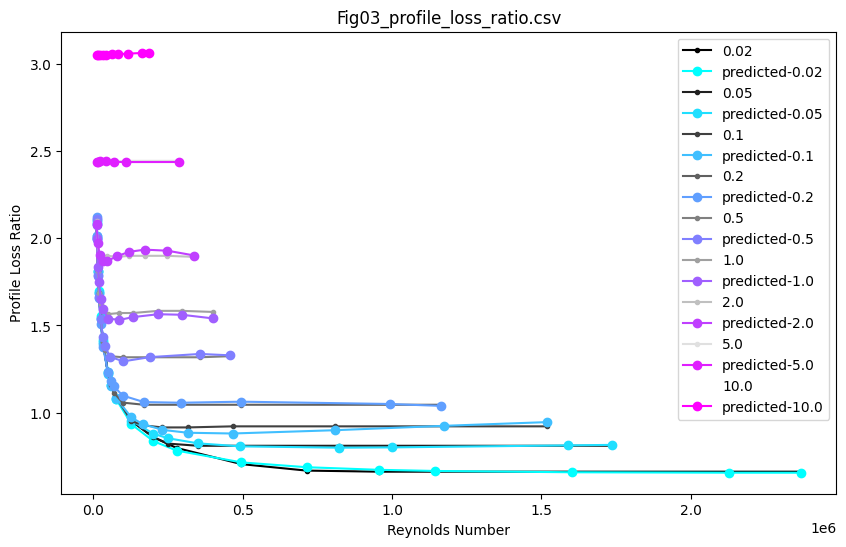

In [ ]:
data['Fig03'].plot()

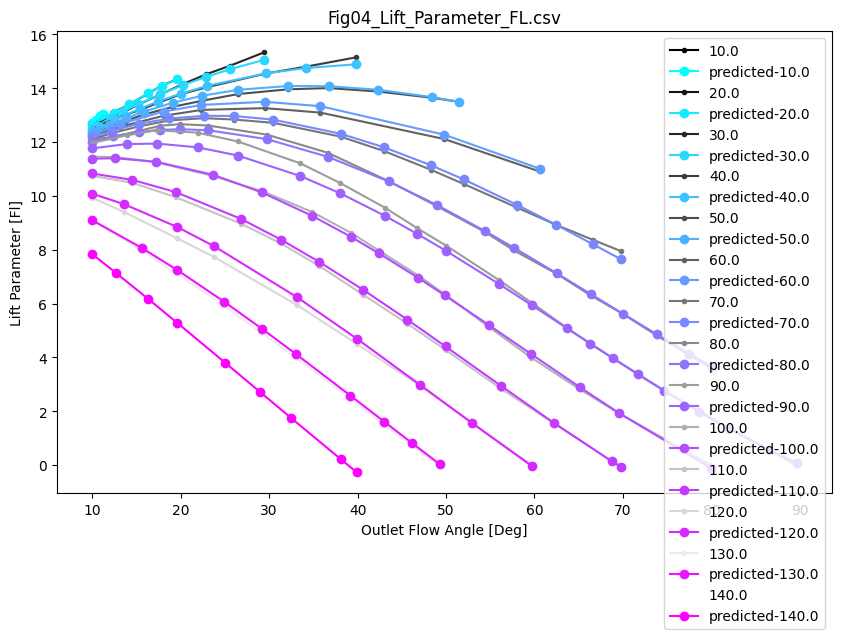

In [ ]:
data['Fig04'].plot()

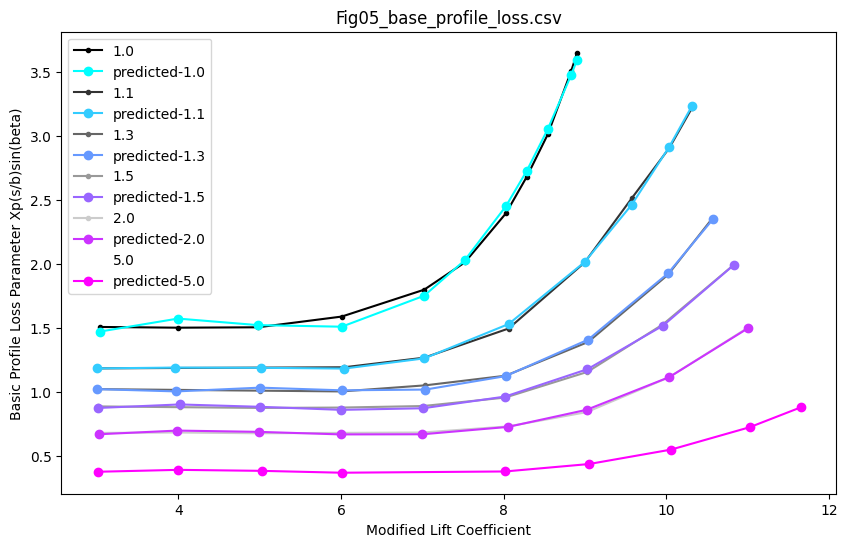

In [ ]:
data['Fig05'].plot()

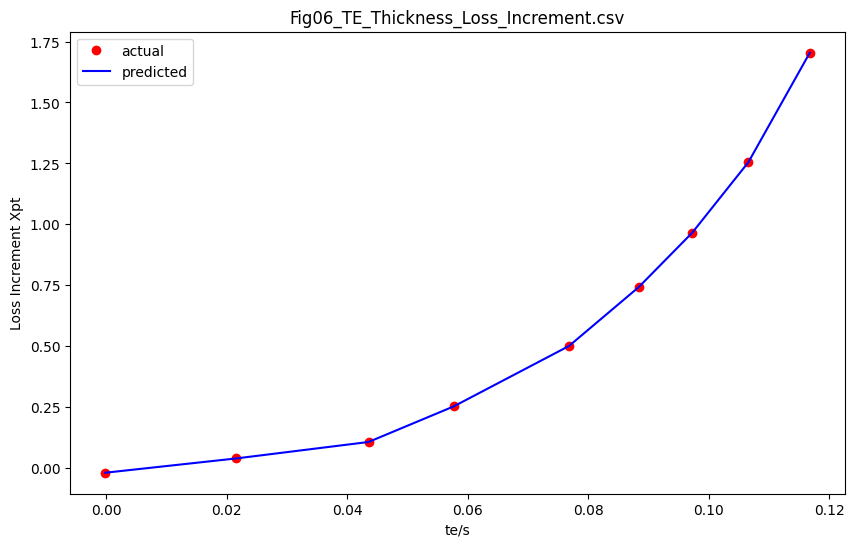

In [ ]:
data['Fig06_delta_Xpt'].plot()

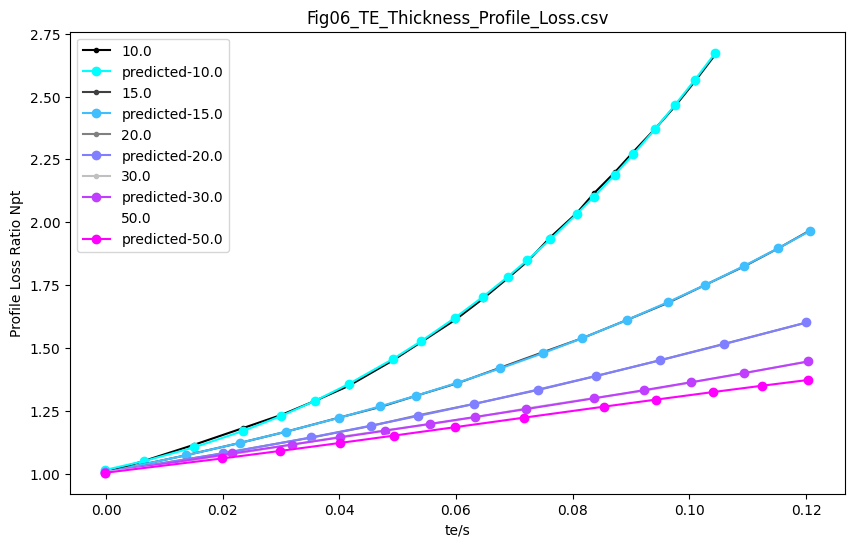

In [ ]:
data['Fig06_Npt'].plot()

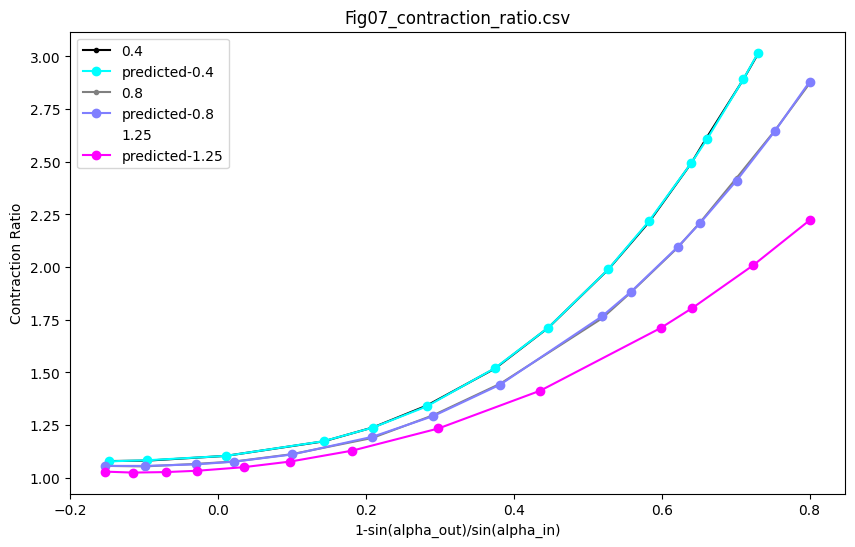

In [ ]:
data['Fig07'].plot()

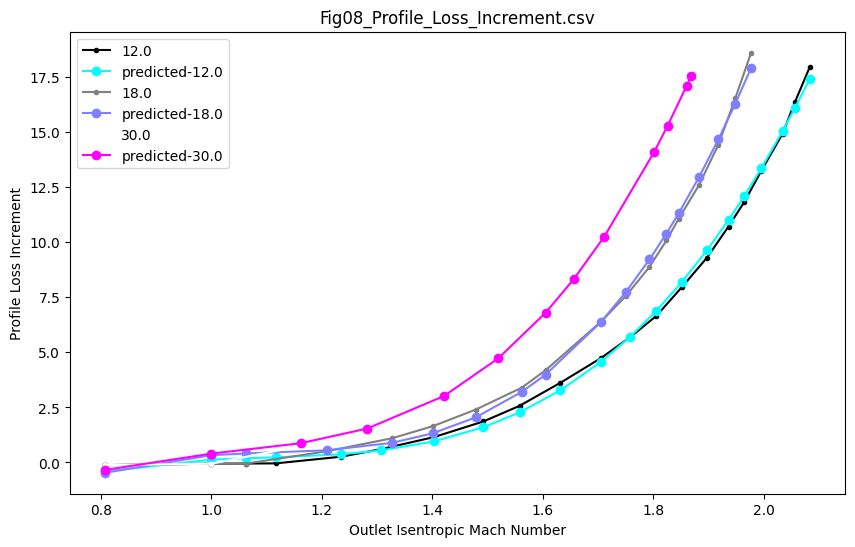

In [ ]:
data['Fig08'].plot()

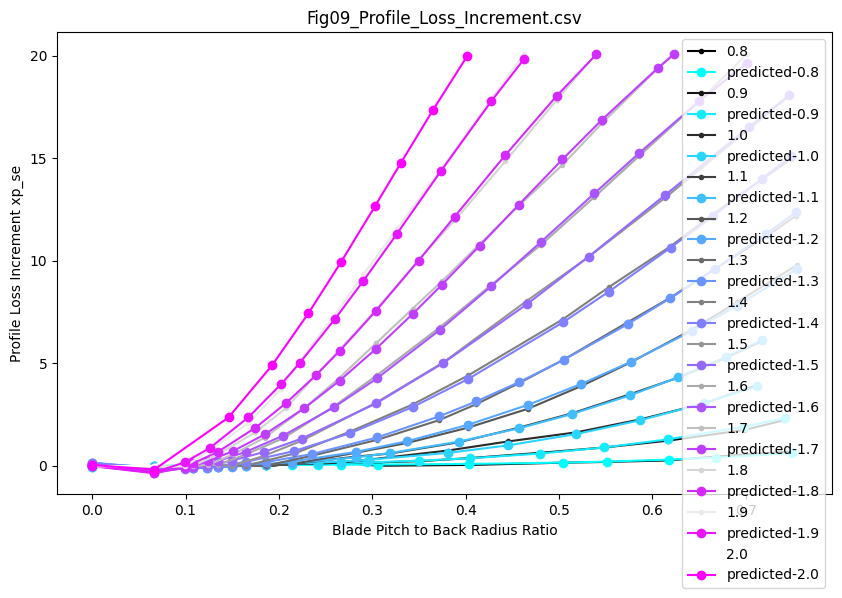

In [ ]:
data['Fig09'].plot()

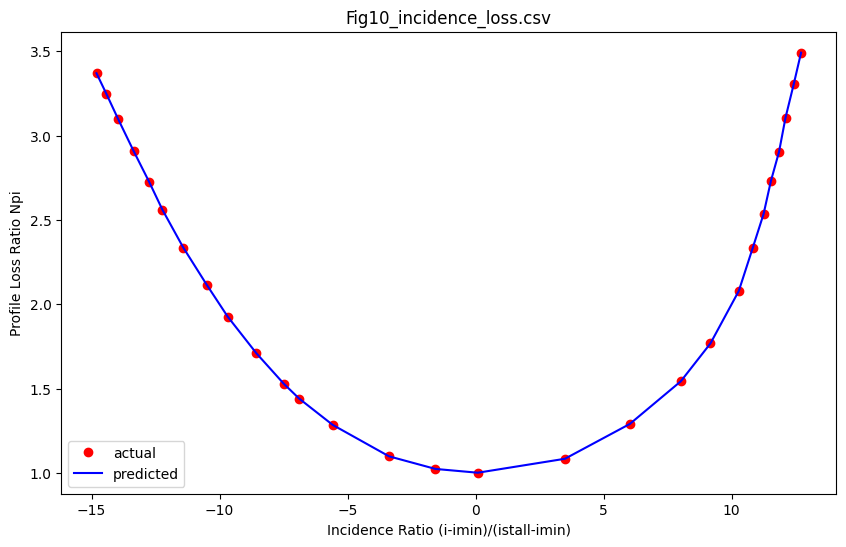

In [ ]:
data['Fig10'].plot()

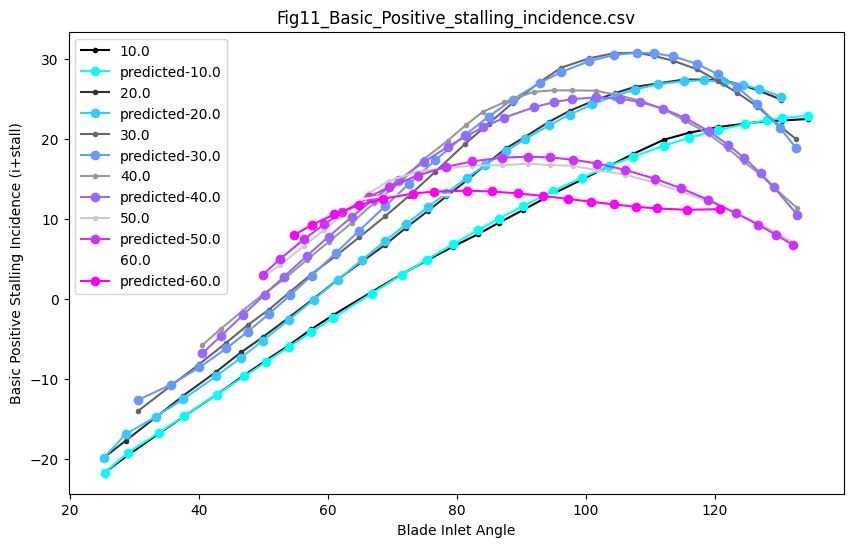

In [ ]:
data['Fig11'].plot()

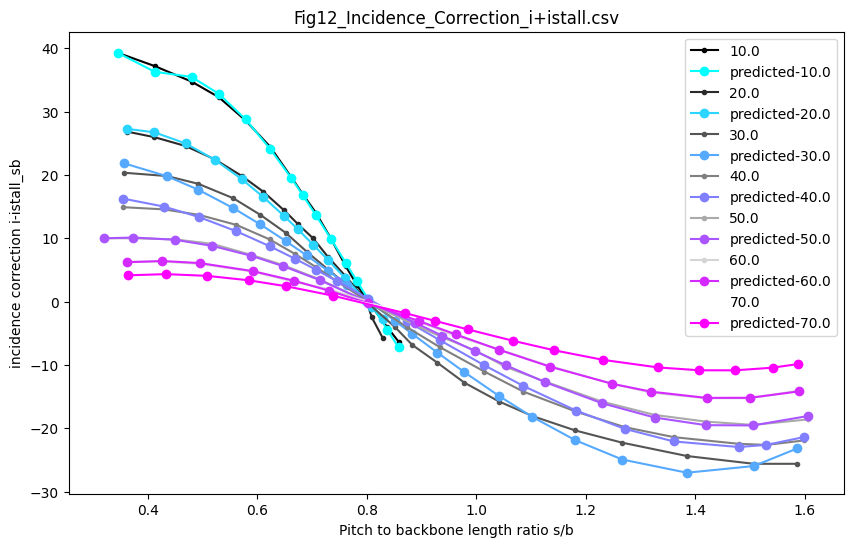

In [ ]:
data['Fig12_sb'].plot()

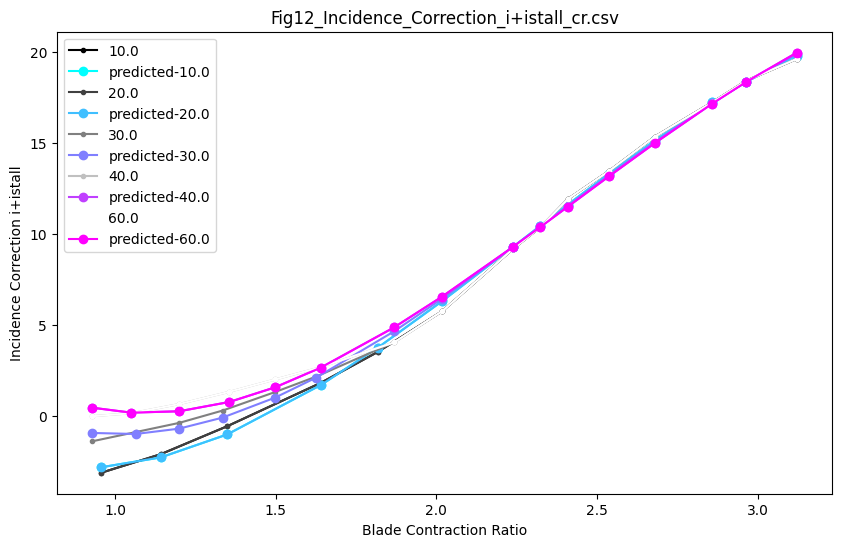

In [ ]:
data['Fig12_cr'].plot()

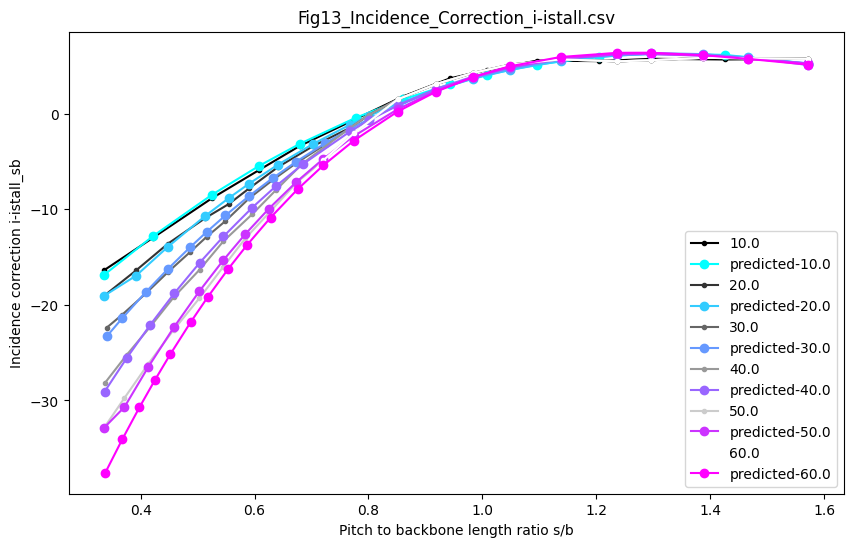

In [ ]:
data['Fig13'].plot()

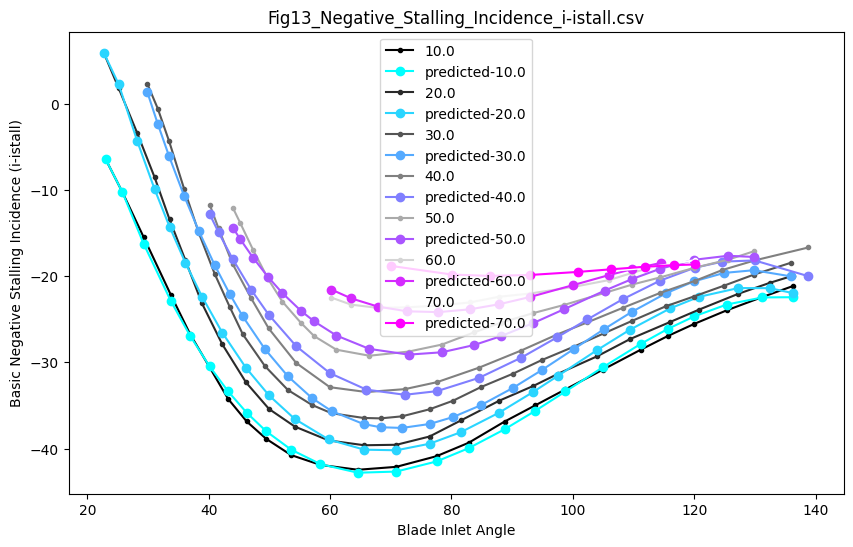

In [ ]:
data['Fig13_alpha1'].plot()

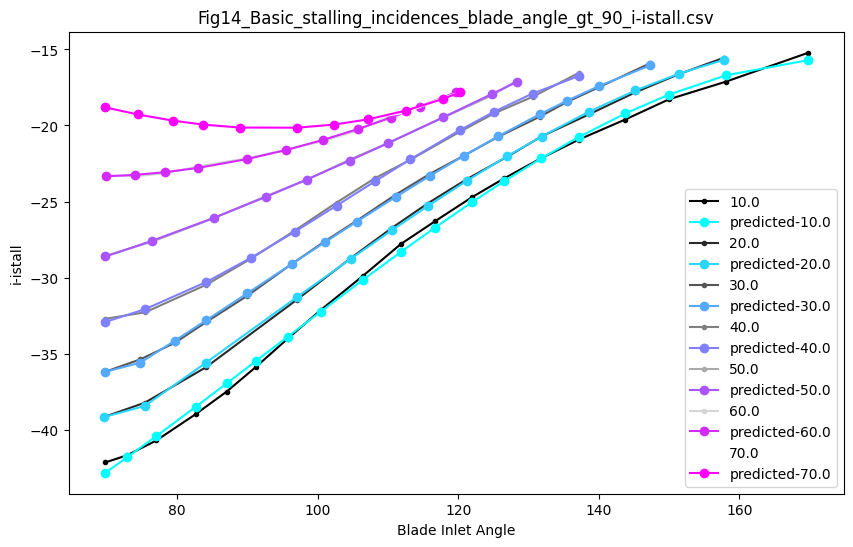

In [ ]:
data['Fig14_i-istall'].plot()

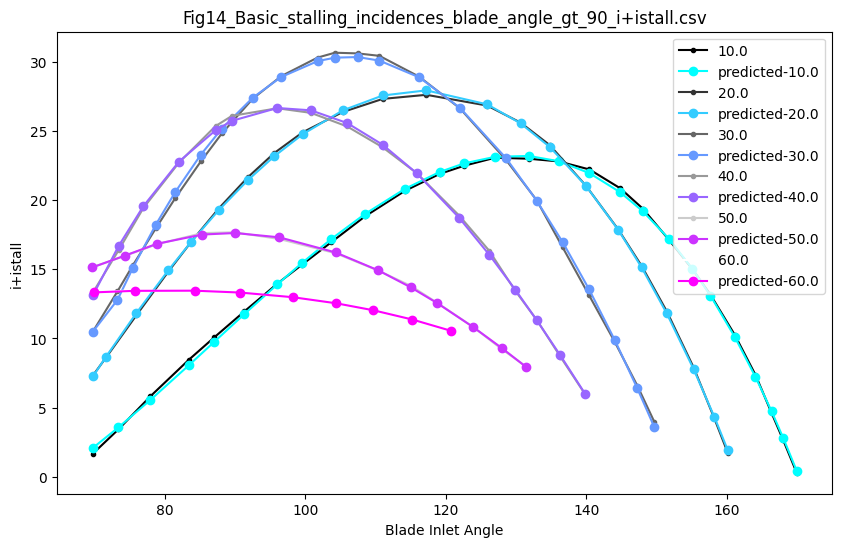

In [ ]:
data['Fig14_i+istall'].plot()

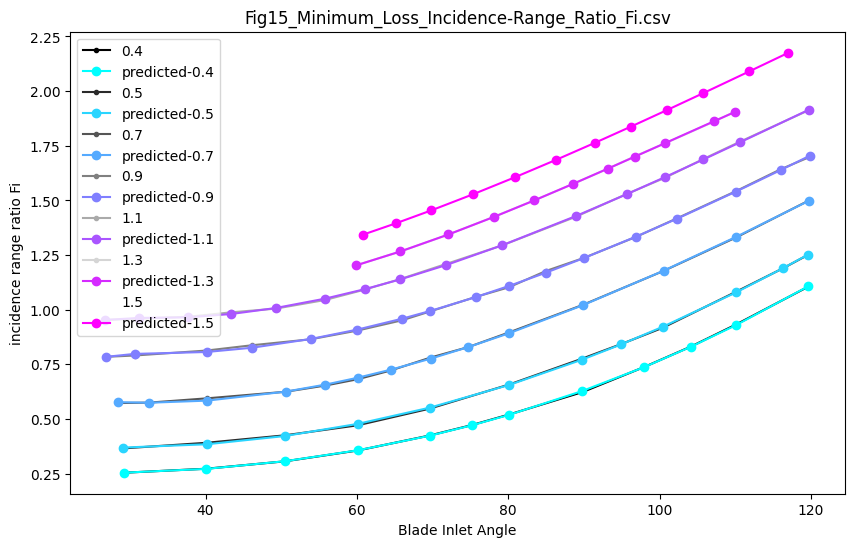

In [ ]:
data['Fig15'].plot()

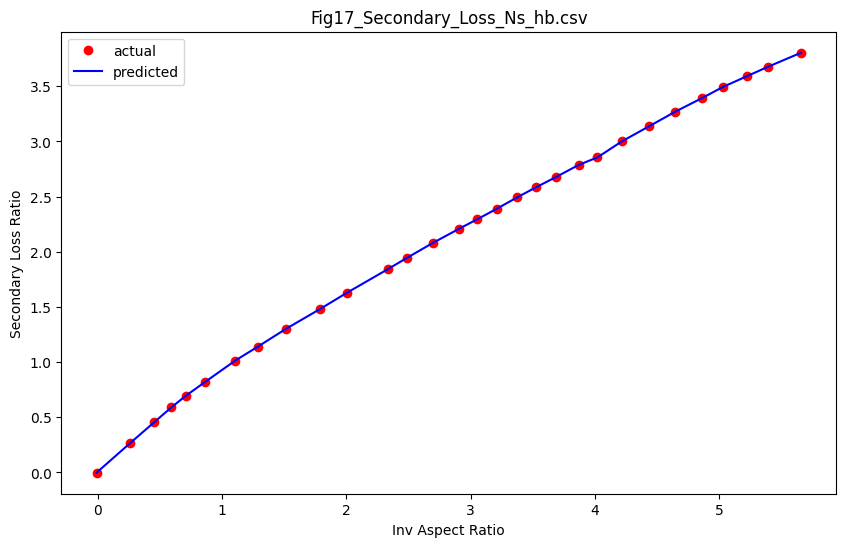

In [ ]:
data['Fig17'].plot()

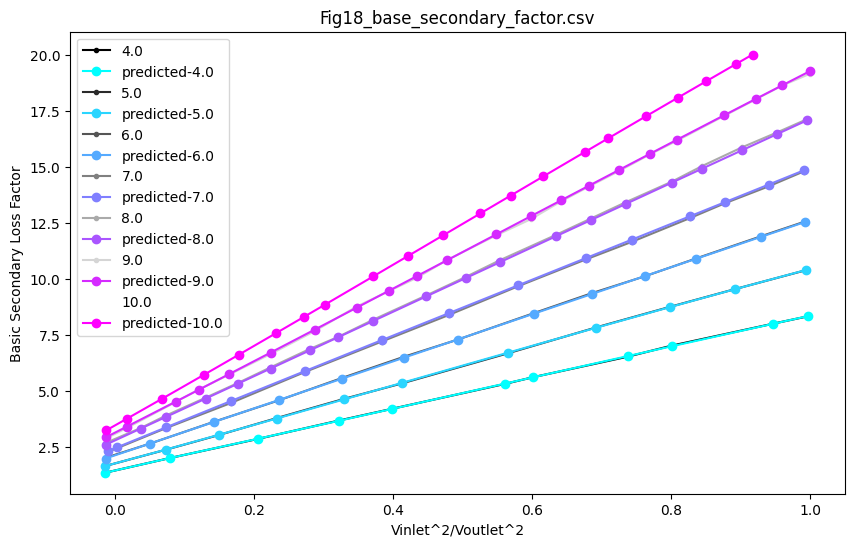

In [ ]:
data['Fig18'].plot()

# How do you use it?

Craig Cox uses the enthalpy loss equation. Group 1 and Group 2 losses are factored into this equation. 

![eqn01](docs/eqn01.png)

Group 1 losses is what I used in the code. Group 2 losses deal with disk windage and hub disk seals. Below contains a list of what group 1 losses consists of. Xp = profile loss. Xs = Secondary Loss. Xa = Annulus wall losses.

![eqn02](docs/eqn02.png)

## Xp - Profile Loss

Knowing the values of the coefficients of $X_p$ requires you to look up the values from the figures. 

![eqn10](docs/eqn10.png)

## Xs - Secondary Loss
![eqn11](docs/eqn11.png)

$N_s$ is no where to be found in any of the figures. I used the value of $N_pr$ as a substitute. 

## Profile Loss Example $X_p$

![eqn10](docs/eqn10.png)

1. Look up $N_{pr}$ from **Figure 3**
2. Find $Fl$ from **Figure 4**
3. $X_{pb}$ look up from **Figure 5**
4. $N_pi$ can be found from **Figure 10** but you need the incidence ratio which could be **Figure 11**, **12**, **14** for the positive incidence. Negative incidence use **Figure 13** and **14**.
5. $N_{pt}$ comes from **Figure 6**.
6. $\Delta X_{pt}$ is from **Figure 6**
7. $\Delta X_{pse}$ is from **Figure 9**
8. $\Delta X_{pm}$ is from **Figure 8**

## Secondary Loss Example $X_s$
1. $(N_{s})_r$ is $N_{pr}$. The value of $(N_{s})_r$ is missing from craig cox paper 
2. $(N_{s})_{h/b}$ comes from **Figure 17**
3. $x_{sb}$ comes from **Figure 18**
